In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

In [2]:
data = np.arange(10)
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

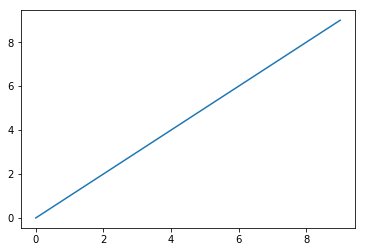

In [3]:
plt.plot(data)

In [5]:
plt.rc('figure', figsize=(10, 6))
fig = plt.figure()

In [7]:
ax1 = fig.add_subplot(2,2,1)

In [8]:
ax2 = fig.add_subplot(2,2,2)

In [9]:
ax3 = fig.add_subplot(2,2,3)

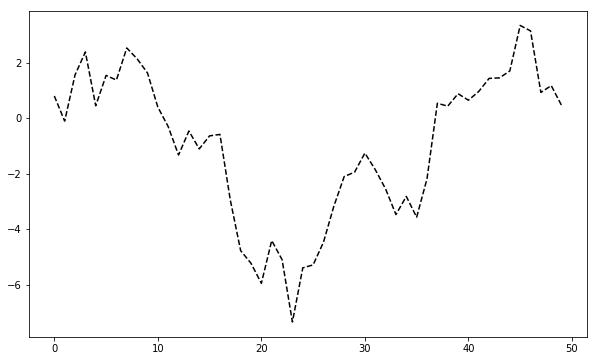

In [10]:
plt.plot(np.random.randn(50).cumsum(),'k--')

In [11]:
_ = ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

In [12]:
plt.close('all')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000098D8080>,
      dtype=object)

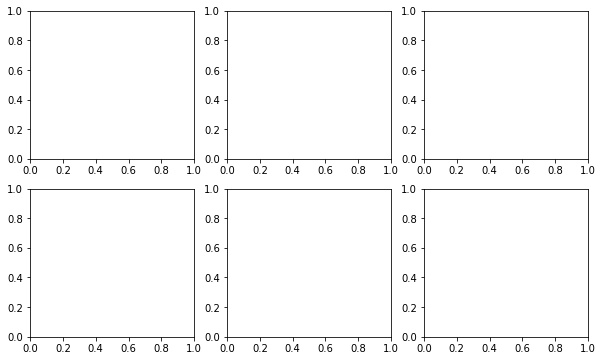

In [13]:
fig,axes = plt.subplots(2,3)
axes

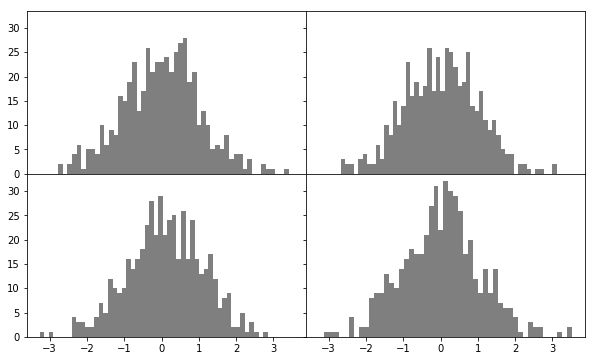

In [14]:
fig,axes = plt.subplots(2,2,sharex=True,sharey=True)
for i in range(2):
    for j in range(2):
        axes[i,j].hist(np.random.randn(500),bins=50,color='k',alpha=0.5)
plt.subplots_adjust(wspace=0,hspace=0)

In [15]:
plt.figure()

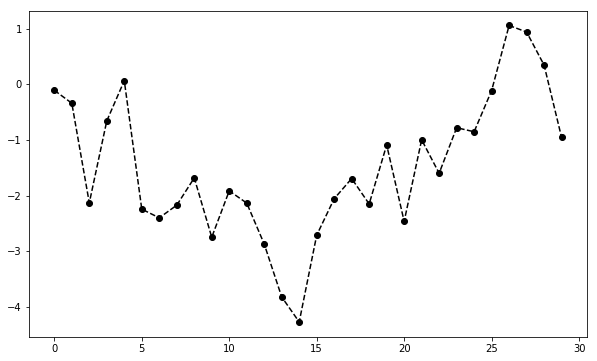

In [16]:
plt.plot(np.random.randn(30).cumsum(), 'ko--')

In [17]:
plt.close('all')

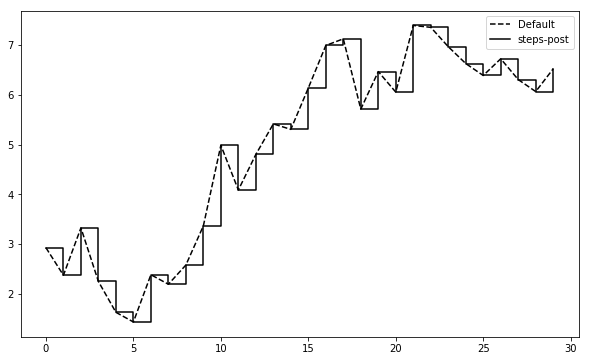

In [18]:
data = np.random.randn(30).cumsum()
plt.plot(data, 'k--', label='Default')
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best')

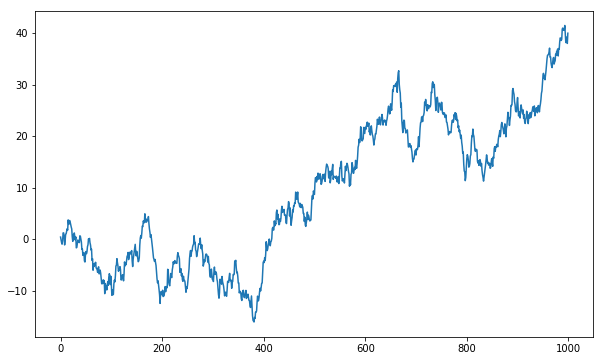

In [19]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())

In [20]:
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                            rotation=30, fontsize='small')

In [21]:
ax.set_title('My first matplotlib plot')
ax.set_xlabel('Stages')

Text(0.5,3.2,'Stages')

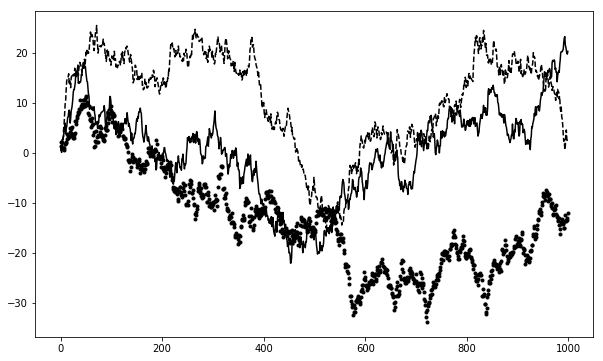

In [22]:
from numpy.random import randn
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum(), 'k', label='one')
ax.plot(randn(1000).cumsum(), 'k--', label='two')
ax.plot(randn(1000).cumsum(), 'k.', label='three')

In [23]:
ax.legend(loc='best')

FileNotFoundError: File b'examples/spx.csv' does not exist

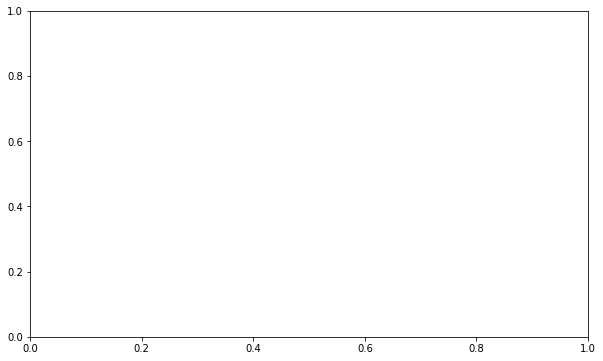

In [25]:
from datetime import datetime

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv('examples/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']

spx.plot(ax=ax, style='k-')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor='black', headwidth=4, width=2,
                                headlength=4),
                horizontalalignment='left', verticalalignment='top')

# Zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in the 2008-2009 financial crisis')

In [26]:
plt.close('all')

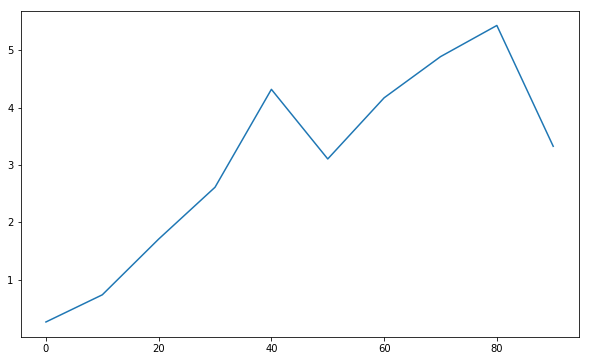

In [27]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

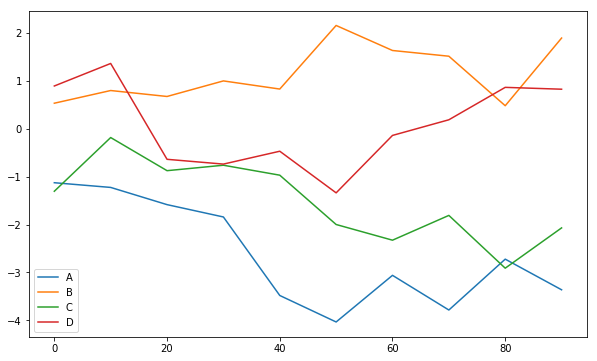

In [28]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                  columns=['A', 'B', 'C', 'D'],
                  index=np.arange(0, 100, 10))
df.plot()

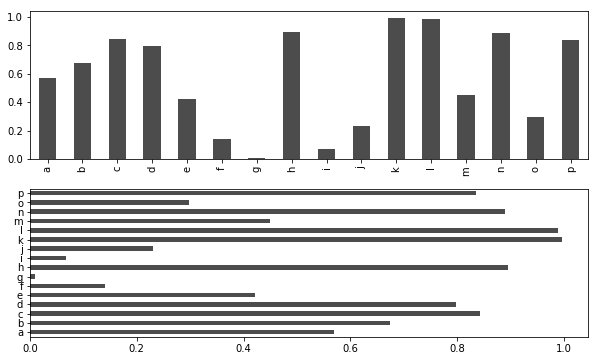

In [29]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0], color='k', alpha=0.7)
data.plot.barh(ax=axes[1], color='k', alpha=0.7)

In [30]:
np.random.seed(12348)

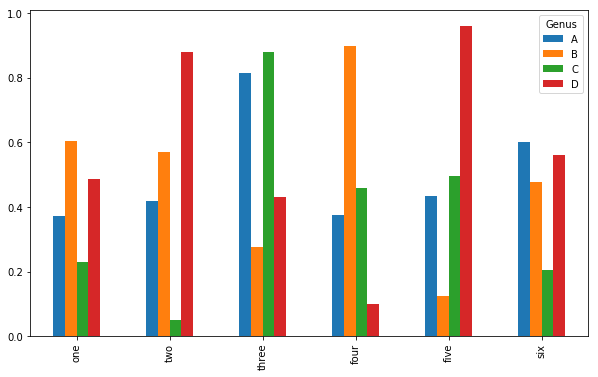

In [31]:
df = pd.DataFrame(np.random.rand(6, 4),
                  index=['one', 'two', 'three', 'four', 'five', 'six'],
                  columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df
df.plot.bar()

In [32]:
plt.figure()

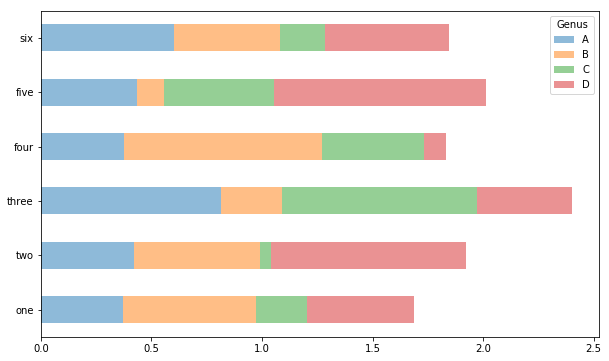

In [33]:
df.plot.barh(stacked=True, alpha=0.5)

In [34]:
df = pd.DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
                   'key2' : ['one', 'two', 'one', 'two', 'one'],
                   'data1' : np.random.randn(5),
                   'data2' : np.random.randn(5)})
df

,data1,data2,key1,key2
0,0.203887,0.757814,a,one
1,-2.213737,1.544269,a,two
2,0.315042,-1.728043,b,one
3,-0.137200,0.793393,b,two
4,0.036238,-0.347674,a,one


In [35]:
grouped = df['data1'].groupby(df['key1'])
grouped

In [36]:
grouped.mean()

key1
a   -0.657871
b    0.088921
Name: data1, dtype: float64

In [37]:
means = df['data1'].groupby([df['key1'], df['key2']]).mean()
means

key1  key2
a     one     0.120063
      two    -2.213737
b     one     0.315042
      two    -0.137200
Name: data1, dtype: float64

In [38]:
means.unstack()

key2,one,two
key1,,
a,0.120063,-2.213737
b,0.315042,-0.137200


In [39]:
states = np.array(['Ohio', 'California', 'California', 'Ohio', 'Ohio'])
years = np.array([2005, 2005, 2006, 2005, 2006])
df['data1'].groupby([states, years]).mean()

California  2005   -2.213737
            2006    0.315042
Ohio        2005    0.033343
            2006    0.036238
Name: data1, dtype: float64

In [40]:
df.groupby('key1').mean()
df.groupby(['key1', 'key2']).mean()

data1     data2
key1 key2                    
a    one   0.120063  0.205070
     two  -2.213737  1.544269
b    one   0.315042 -1.728043
     two  -0.137200  0.793393

In [41]:
df.groupby(['key1', 'key2']).size()

key1  key2
a     one     2
      two     1
b     one     1
      two     1
dtype: int64

In [42]:
for name, group in df.groupby('key1'):
    print(name)
    print(group)

a
      data1     data2 key1 key2
0  0.203887  0.757814    a  one
1 -2.213737  1.544269    a  two
4  0.036238 -0.347674    a  one
b
      data1     data2 key1 key2
2  0.315042 -1.728043    b  one
3 -0.137200  0.793393    b  two


In [43]:
for (k1, k2), group in df.groupby(['key1', 'key2']):
    print((k1, k2))
    print(group)

('a', 'one')
      data1     data2 key1 key2
0  0.203887  0.757814    a  one
4  0.036238 -0.347674    a  one
('a', 'two')
      data1     data2 key1 key2
1 -2.213737  1.544269    a  two
('b', 'one')
      data1     data2 key1 key2
2  0.315042 -1.728043    b  one
('b', 'two')
    data1     data2 key1 key2
3 -0.1372  0.793393    b  two


In [44]:
pieces = dict(list(df.groupby('key1')))
pieces['b']

,data1,data2,key1,key2
2,0.315042,-1.728043,b,one
3,-0.137200,0.793393,b,two


In [45]:
df.dtypes
grouped = df.groupby(df.dtypes, axis=1)

In [46]:
for dtype, group in grouped:
    print(dtype)
    print(group)

float64
      data1     data2
0  0.203887  0.757814
1 -2.213737  1.544269
2  0.315042 -1.728043
3 -0.137200  0.793393
4  0.036238 -0.347674
object
  key1 key2
0    a  one
1    a  two
2    b  one
3    b  two
4    a  one


In [47]:
df.groupby(['key1', 'key2'])[['data2']].mean()

data2
key1 key2          
a    one   0.205070
     two   1.544269
b    one  -1.728043
     two   0.793393

In [48]:
s_grouped = df.groupby(['key1', 'key2'])['data2']
s_grouped
s_grouped.mean()

key1  key2
a     one     0.205070
      two     1.544269
b     one    -1.728043
      two     0.793393
Name: data2, dtype: float64

In [49]:
people = pd.DataFrame(np.random.randn(5, 5),
                      columns=['a', 'b', 'c', 'd', 'e'],
                      index=['Joe', 'Steve', 'Wes', 'Jim', 'Travis'])
people.iloc[2:3, [1, 2]] = np.nan # Add a few NA values
people

,a,b,c,d,e
Joe,0.352498,1.028299,1.196514,-0.123497,-1.332044
Steve,-0.247196,1.175993,1.675405,0.674191,-0.110653
Wes,-3.182668,NaN,NaN,1.001197,-1.052050
Jim,-0.991769,0.356595,-0.368673,0.904145,1.166427
Travis,-1.525369,-0.291607,-1.872546,-0.836380,-0.580216


In [50]:
mapping = {'a': 'red', 'b': 'red', 'c': 'blue',
           'd': 'blue', 'e': 'red', 'f' : 'orange'}

In [51]:
by_column = people.groupby(mapping, axis=1)
by_column.sum()

,blue,red
Joe,1.073017,0.048754
Steve,2.349596,0.818144
Wes,1.001197,-4.234718
Jim,0.535472,0.531253
Travis,-2.708926,-2.397192


In [52]:
map_series = pd.Series(mapping)
map_series
people.groupby(map_series, axis=1).count()

,blue,red
Joe,2,3
Steve,2,3
Wes,1,2
Jim,2,3
Travis,2,3


In [53]:
people.groupby(len).sum()

,a,b,c,d,e
3,-3.821939,1.384894,0.827841,1.781845,-1.217666
5,-0.247196,1.175993,1.675405,0.674191,-0.110653
6,-1.525369,-0.291607,-1.872546,-0.836380,-0.580216


In [55]:
key_list = ['one', 'one', 'one', 'two', 'two']
people.groupby([len, key_list]).min()

a         b         c         d         e
3 one -3.182668  1.028299  1.196514 -0.123497 -1.332044
  two -0.991769  0.356595 -0.368673  0.904145  1.166427
5 one -0.247196  1.175993  1.675405  0.674191 -0.110653
6 two -1.525369 -0.291607 -1.872546 -0.836380 -0.580216

In [56]:
columns = pd.MultiIndex.from_arrays([['US', 'US', 'US', 'JP', 'JP'],
                                    [1, 3, 5, 1, 3]],
                                    names=['cty', 'tenor'])
hier_df = pd.DataFrame(np.random.randn(4, 5), columns=columns)
hier_df

cty          US                            JP          
tenor         1         3         5         1         3
0     -0.173833  1.482986  1.938581 -0.906224 -0.171236
1     -1.221896  0.446805  0.832024 -0.043014 -0.024175
2     -0.759594  0.994835  0.634475 -0.848585  0.351294
3     -0.707231 -0.885486 -0.474923  0.071696 -0.197361

In [57]:
hier_df.groupby(level='cty', axis=1).count()

cty,JP,US
0,2,3
1,2,3
2,2,3
3,2,3


In [58]:
df
grouped = df.groupby('key1')
grouped['data1'].quantile(0.9)

key1
a    0.170357
b    0.269818
Name: data1, dtype: float64

In [59]:
def peak_to_peak(arr):
    return arr.max() - arr.min()
grouped.agg(peak_to_peak)

,data1,data2
key1,,
a,2.417624,1.891943
b,0.452242,2.521436


In [60]:
grouped.describe()

data1                                                              \
     count      mean       std       min       25%       50%       75%   
key1                                                                     
a      3.0 -0.657871  1.350025 -2.213737 -1.088749  0.036238  0.120063   
b      2.0  0.088921  0.319783 -0.137200 -0.024140  0.088921  0.201981   

               data2                                                    \
           max count      mean       std       min       25%       50%   
key1                                                                     
a     0.203887   3.0  0.651470  0.950444 -0.347674  0.205070  0.757814   
b     0.315042   2.0 -0.467325  1.782924 -1.728043 -1.097684 -0.467325   

                          
           75%       max  
key1                      
a     1.151042  1.544269  
b     0.163034  0.793393

In [62]:
s = pd.Series(np.random.randn(6))
s[::2] = np.nan
s
s.fillna(s.mean())

0    0.054732
1   -0.606889
2    0.054732
3    0.999744
4    0.054732
5   -0.228657
dtype: float64

In [63]:
states = ['Ohio', 'New York', 'Vermont', 'Florida',
          'Oregon', 'Nevada', 'California', 'Idaho']
group_key = ['East'] * 4 + ['West'] * 4
data = pd.Series(np.random.randn(8), index=states)
data

Ohio         -0.299513
New York     -2.393486
Vermont       0.483202
Florida       0.122293
Oregon        1.567462
Nevada        0.352785
California   -1.569244
Idaho         1.351345
dtype: float64

In [64]:
data[['Vermont', 'Nevada', 'Idaho']] = np.nan
data
data.groupby(group_key).mean()

East   -0.856902
West   -0.000891
dtype: float64

In [65]:
fill_mean = lambda g: g.fillna(g.mean())
data.groupby(group_key).apply(fill_mean)

Ohio         -0.299513
New York     -2.393486
Vermont      -0.856902
Florida       0.122293
Oregon        1.567462
Nevada       -0.000891
California   -1.569244
Idaho        -0.000891
dtype: float64

In [66]:
fill_values = {'East': 0.5, 'West': -1}
fill_func = lambda g: g.fillna(fill_values[g.name])
data.groupby(group_key).apply(fill_func)

Ohio         -0.299513
New York     -2.393486
Vermont       0.500000
Florida       0.122293
Oregon        1.567462
Nevada       -1.000000
California   -1.569244
Idaho        -1.000000
dtype: float64

In [67]:
suits = ['H', 'S', 'C', 'D']
card_val = (list(range(1, 11)) + [10] * 3) * 4
base_names = ['A'] + list(range(2, 11)) + ['J', 'K', 'Q']
cards = []
for suit in ['H', 'S', 'C', 'D']:
    cards.extend(str(num) + suit for num in base_names)

deck = pd.Series(card_val, index=cards)

In [68]:
deck[:13]

AH      1
2H      2
3H      3
4H      4
5H      5
6H      6
7H      7
8H      8
9H      9
10H    10
JH     10
KH     10
QH     10
dtype: int64

In [69]:
def draw(deck, n=5):
    return deck.sample(n)
draw(deck)

KH    10
9D     9
KS    10
4H     4
3S     3
dtype: int64

In [70]:
get_suit = lambda card: card[-1]
deck.groupby(get_suit).apply(draw, n=2)

C  QC     10
   10C    10
D  5D      5
   3D      3
H  10H    10
   7H      7
S  KS     10
   4S      4
dtype: int64

In [71]:
deck.groupby(get_suit, group_keys=False).apply(draw, n=2)

8C      8
10C    10
8D      8
3D      3
5H      5
KH     10
3S      3
JS     10
dtype: int64

In [72]:
df = pd.DataFrame({'category': ['a', 'a', 'a', 'a',
                                'b', 'b', 'b', 'b'],
                   'data': np.random.randn(8),
                   'weights': np.random.rand(8)})
df

,category,data,weights
0,a,0.785882,0.677169
1,a,0.716928,0.060102
2,a,1.122523,0.227210
3,a,1.971385,0.904401
4,b,-0.725670,0.349015
5,b,-0.516651,0.016091
6,b,-0.356423,0.973264
7,b,-0.040331,0.019203


In [73]:
grouped = df.groupby('category')
get_wavg = lambda g: np.average(g['data'], weights=g['weights'])
grouped.apply(get_wavg)

category
a    1.398288
b   -0.448780
dtype: float64

In [75]:
import statsmodels.api as sm
def regress(data, yvar, xvars):
    Y = data[yvar]
    X = data[xvars]
    X['intercept'] = 1.
    result = sm.OLS(Y, X).fit()
    return result.params

D:\tools\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [76]:
by_year.apply(regress, 'AAPL', ['SPX'])

NameError: name 'by_year' is not defined

In [77]:
from io import StringIO
data = """\
Sample  Nationality  Handedness
1   USA  Right-handed
2   Japan    Left-handed
3   USA  Right-handed
4   Japan    Right-handed
5   Japan    Left-handed
6   Japan    Right-handed
7   USA  Right-handed
8   USA  Left-handed
9   Japan    Right-handed
10  USA  Right-handed"""
data = pd.read_table(StringIO(data), sep='\s+')

In [78]:
data

,Sample,Nationality,Handedness
0,1,USA,Right-handed
1,2,Japan,Left-handed
2,3,USA,Right-handed
3,4,Japan,Right-handed
4,5,Japan,Left-handed
5,6,Japan,Right-handed
6,7,USA,Right-handed
7,8,USA,Left-handed
8,9,Japan,Right-handed
9,10,USA,Right-handed


In [79]:
pd.crosstab(data.Nationality, data.Handedness, margins=True)


Handedness,Left-handed,Right-handed,All
Nationality,,,
Japan,2,3,5
USA,1,4,5
All,3,7,10
